# I. Condorcet's Jury Theorem (1785)

Assume voter probability be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging)

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers)

# II. AdaBoost From Scratch


*   Implement the AdaBoost algorithm for classification task. Your `AdaBoost` class should receive a method for creating a weak learner, which has a fit and predict methods (**hint**: you can simulate re-weighting of the samples by an appropriate re-sampling of the train set).
*   Use your model to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` with the default parameters). 
    - Split the sample set into train and test sets.
    - Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, and visualize the final iteration weights of the samples in those plots.
    - How does the overall train set accuracy changes with $n$?
    - Does you model starts to overfit at some point?


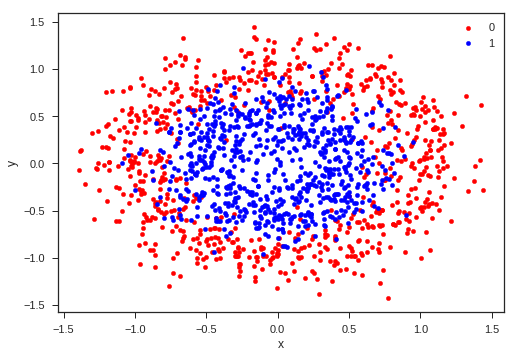

In [79]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [0]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

class Adaboost:

    def __init__(self, weak_learner_factory, n):
        self.weak_learner_factory = weak_learner_factory
        self.n = n
        self.alphas = []
        self.models = []


    def fit(self, X, y):
        y = np.where(y == 0, -1, 1)
        n = len(y)
        weights = np.ones(n) / (n * 1.0)

        for t in range(self.n):
            output = np.random.choice(n, n, p=weights)
            X_t = X[output]
            y_t = y[output]


            wl = self.weak_learner_factory()

            wl.fit(X_t, y_t)

            y_tag_t = wl.predict(X)
            
            error_t = np.sum((y_tag_t != y) * weights)
            
            alpha_t = 0.5 * np.log((1 - error_t) / error_t)
            
            self.alphas.append(alpha_t)
            weights = weights * np.exp(-alpha_t *  y *  y_tag_t)
            weights = weights / np.sum(weights)
            self.models.append(wl)



    def predict(self, X):

        all_sums = np.zeros(len(X))

        for index, wl in enumerate(self.models):
            prediciotn = self.alphas[index] * wl.predict(X)
            all_sums += prediciotn

        return np.where(all_sums > 0, 1, 0)
    
    def decision_function(self, X):
        all_sums = np.zeros(len(X))

        for index, wl in enumerate(self.models):
            prediciotn = self.alphas[index] * wl.predict(X)
            all_sums += prediciotn
        
        return all_sums




      

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                        random_state=999)

model = Adaboost(lambda : LinearSVC(random_state=999), 1000)

model.fit(X_train, y_train)
y_test_tag = model.predict(X_test)
print(np.sum(y_test_tag == y_test) / (len(y_test) * 1.0))

0.88


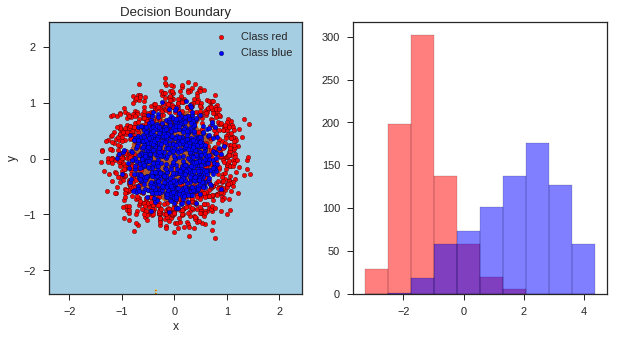

In [87]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

plot_colors = ["r", "b"]
plot_step = 0.02
class_names = ['red' ,'blue']

plt.figure(figsize=(10, 5))
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")


for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')   

twoclass_output = model.decision_function(X)
(twoclass_output.shape, X.shape, twoclass_output[1])

plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                        random_state=999)

model = Adaboost(lambda : LinearSVC(random_state=999), 100)

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning:

Liblinear

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

X[0]


# bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
#                          algorithm="SAMME",
#                          n_estimators=200)

# bdt.fit(X, y)

# plot_colors = "br"
# plot_step = 0.02
# class_names = "AB"

# plt.figure(figsize=(10, 5))

# # Plot the decision boundaries
# plt.subplot(121)
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                      np.arange(y_min, y_max, plot_step))

# Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# plt.axis("tight")

# for i, n, c in zip(range(2), class_names, plot_colors):
#     idx = np.where(y == i)
#     plt.scatter(X[idx, 0], X[idx, 1],
#                 c=c, cmap=plt.cm.Paired,
#                 s=20, edgecolor='k',
#                 label="Class %s" % n)
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.legend(loc='upper right')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Decision Boundary')

# twoclass_output = bdt.decision_function(X)
# plot_range = (twoclass_output.min(), twoclass_output.max())
# plt.subplot(122)
# for i, n, c in zip(range(2), class_names, plot_colors):
#     plt.hist(twoclass_output[y == i],
#              bins=10,
#              range=plot_range,
#              facecolor=c,
#              label='Class %s' % n,
#              alpha=.5,
#              edgecolor='k')
# x1, x2, y1, y2 = plt.axis()
# plt.axis((x1, x2, y1, y2 * 1.2))
# plt.legend(loc='upper right')
# plt.ylabel('Samples')
# plt.xlabel('Score')
# plt.title('Decision Scores')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.35)
# plt.show()

array([ 0.70033457, -0.24706758])

# III. Boosting Trees from Scratch
* Use the scikit-learn's DecisionTreeRegressor with `max_depth = 1` (stumps)  to write a L2Boost model which minimize the L2 square loss iteration by iteration.
Reminder: in each step, build a decision tree to minimize the error between the true label and the accumulated (sum) of the previous step predictions.
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)
* Use the Boston dataset to plot the MSE as a function of the number of trees for a logspace of `n_trees` up to 1,000. What is the optimal value of `n_trees`? of learning rate?
* Compare the performance with a deep DecisionTreeRegressor (find the optimal `max_depth`).  Who wins?
* **Optional**: add an early-stopping mechanisim to the GBTL2 model to use a validation set to detect over-fit.

In [0]:

from sklearn.tree import DecisionTreeRegressor
import numpy as np

class SimpleModel:

    def __init__(self, prev_model, mu):
        self.prev_model = prev_model
        self.mu = mu
        self.mode=  None

    def fit(self, X, y):
        target = y - self.prev_model.predict(X)
        self.model = DecisionTreeRegressor(max_depth=1)
        self.model.fit(X, target)

    def predict(self, X):
        return self.prev_model.predict(X) + self.mu * self.model.predict(X)


class MeanModel:

    def __init__(self):
        self.mode=  None

    def fit(self, X, y):
        mean = np.mean(X)

        self.model = lambda x: np.repeat(mean, len(x))

    def predict(self, X):
        return self.model(X)



class L2Boost:

    def __init__(self, M, mu):
        self.M = M
        self.mu = mu
        self.model = None

    def fit(self, X, y):

        self.model = MeanModel()
        self.model.fit(X, y)

        for i in range(self.M):
            current = SimpleModel(self.model, self.mu)
            current.fit(X, y)
            self.model = current

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        predicions = self.predict(X)
        mse = np.mean(np.square(y - predicions))

        return mse



In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import sys
sys.setrecursionlimit(1500)

X, y = load_boston(return_X_y=True)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=999)

In [4]:
model = L2Boost(1000, 0.01)
model.fit(X_train, y_train)
model.score(X_test, y_test)

13.66452374866133

In [12]:
lrs = [0.001]
n_trees = range(100, 1000, 100)

tree_size_score = {'tree_size': [], 'score':[]}
for lr in lrs:
  for n_tree in n_trees:
    n_tree = int(n_tree)
    tree_size_score['tree_size'].append(n_tree)
    
    model = L2Boost(n_tree, lr)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    tree_size_score['score'].append(score)
    

100
200
300
400
500
600
700
800
900


Text(1.0060000000000002, 0.5, 'score')

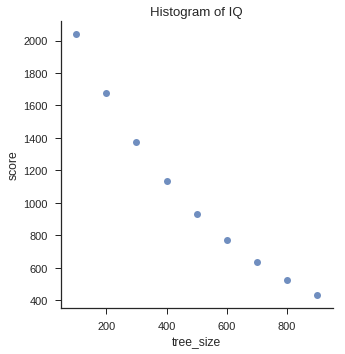

In [14]:
import pandas as pd
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(tree_size_score)

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('tree_size', 'score',  data=df,  fit_reg=False)

plt.title('Histogram of IQ')

plt.xlabel('tree_size')

plt.ylabel('score')


In [0]:
np.logspace(10, 1000)

/usr/local/lib/python3.6/dist-packages/numpy/core/function_base.py:233: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


array([1.00000000e+010, 1.59985872e+030, 2.55954792e+050, 4.09491506e+070,
       6.55128557e+090, 1.04811313e+111, 1.67683294e+131, 2.68269580e+151,
       4.29193426e+171, 6.86648845e+191, 1.09854114e+212, 1.75751062e+232,
       2.81176870e+252, 4.49843267e+272, 7.19685673e+292,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf])